## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter

# Tratamento (entrega 2)
> Developed in "**/data_treatment.ipynb**"

# Caracterização (Entrega 3)

In [12]:
df_cleaned = pd.read_excel('output/school_ranged_years_cleaned_data.xlsx',
                           engine='openpyxl',
                           index_col=[0])
df_cleaned.head()

,ano,municipio,id_escola,nome_escola,aprovado,reprovado,abandono
15827,2020,SANTO ANDRE,8175,NADIR LESSA TOGNINI PROFESSORA,100.00,0.00,0.00
15828,2020,SANTO ANDRE,8709,ESTHER MEDINA PROFESSORA,100.00,0.00,0.00
15830,2020,SAO BERNARDO DO CAMPO,8783,PEDRA DE CARVALHO PROFESSORA,100.00,0.00,0.00
15831,2020,SAO BERNARDO DO CAMPO,8825,LAUDO FERREIRA DE CAMARGO MINISTRO,96.32,2.57,1.11
15832,2020,SAO BERNARDO DO CAMPO,8874,ROBERT KENNEDY SENADOR,100.00,0.00,0.00


## Ranking counties by school quantity from entire dataset

* Choosed 20 firsts with higher values

In [18]:
county_list = Counter(df_cleaned['municipio'].tolist())
final_list = []

for county in county_list:
    temp = {"county_name": county, "schools": county_list[county]} 
    final_list.append(temp)


ordered_list = sorted(final_list, key=lambda x: x['schools'], reverse=True)
county_name_list = [county['county_name'] for county in ordered_list[:20]]

df_cleaned = df_cleaned[df_cleaned['municipio'].isin(county_name_list)]

## Slicing dataframe by years

In [35]:
df_2019 = df_cleaned[df_cleaned['ano'] == 2019]
df_2020 = df_cleaned[df_cleaned['ano'] == 2020]
df_2021 = df_cleaned[df_cleaned['ano'] == 2021]

## Creating Standard bypass

In [44]:
row_labels = ['2019', '2020', '2021']
columns = ['aprovado', 'reprovado', 'abandono']

In [45]:
std_2019 = [str(df_2019['aprovado'].std()), str(df_2019['reprovado'].std()), str(df_2019['abandono'].std())]
std_2020 = [str(df_2020['aprovado'].std()), str(df_2020['reprovado'].std()), str(df_2020['abandono'].std())]
std_2021 = [str(df_2021['aprovado'].std()), str(df_2021['reprovado'].std()), str(df_2021['abandono'].std())]

df_std = pd.DataFrame([std_2019, std_2020, std_2021], columns=columns)
df_std.index = row_labels
df_std

,aprovado,reprovado,abandono
2019,9.58768741824272,7.973251692583739,4.084172282477715
2020,6.00575613724732,5.013046614179726,1.7374247698946916
2021,5.353962644598351,4.784330151039836,2.301052654617612


## Creating Central Tendency 

### Mean

In [46]:
mean_2019 = [df_2019['aprovado'].mean(), df_2019['reprovado'].mean(), df_2019['abandono'].mean()]
mean_2020 = [df_2020['aprovado'].mean(), df_2020['reprovado'].mean(), df_2020['abandono'].mean()]
mean_2021 = [df_2021['aprovado'].mean(), df_2021['reprovado'].mean(), df_2021['abandono'].mean()]

df_mean = pd.DataFrame([mean_2019, mean_2020, mean_2021], columns=columns)
df_mean.index = row_labels
df_mean

,aprovado,reprovado,abandono
2019,88.235052,8.614595,3.150352
2020,97.551026,1.963191,0.379967
2021,96.758491,2.577459,0.664050


### Quantile

In [47]:
quantile_2019 = [df_2019['aprovado'].quantile(), df_2019['reprovado'].quantile(), df_2019['abandono'].quantile()]
quantile_2020 = [df_2020['aprovado'].quantile(), df_2020['reprovado'].quantile(), df_2020['abandono'].quantile()]
quantile_2021 = [df_2021['aprovado'].quantile(), df_2021['reprovado'].quantile(), df_2021['abandono'].quantile()]

df_quantile = pd.DataFrame([quantile_2019, quantile_2020, quantile_2021], columns=columns)
df_quantile.index = row_labels
df_quantile

,aprovado,reprovado,abandono
2019,89.915,7.18,1.45
2020,100.000,0.00,0.00
2021,99.400,0.00,0.00


### Creating a Correlation Matrix

In [52]:
correlation_2019 = df_2019[['aprovado', 'reprovado', 'abandono']].corr()
correlation_2020 = df_2020[['aprovado', 'reprovado', 'abandono']].corr()
correlation_2021 = df_2021[['aprovado', 'reprovado', 'abandono']].corr()

,aprovado,reprovado,abandono
aprovado,1.000000,-0.907947,-0.575000
reprovado,-0.907947,1.000000,0.179193
abandono,-0.575000,0.179193,1.000000


# Visualização das informações (Entrega 4)

## Standard deviation plot (REVISAR)

<AxesSubplot: xlabel='Coluna de análise', ylabel='Resultado desvio padrão'>

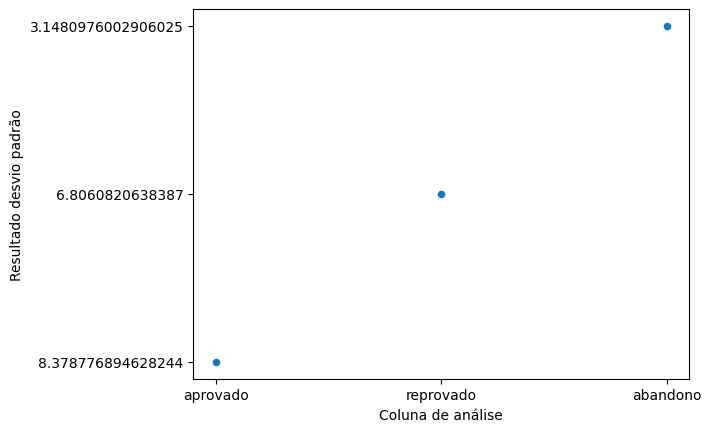

In [26]:
df_std.plot(x='Coluna de análise', y='Resultado desvio padrão', kind='scatter')

## Correlation matrix plot

### 2019

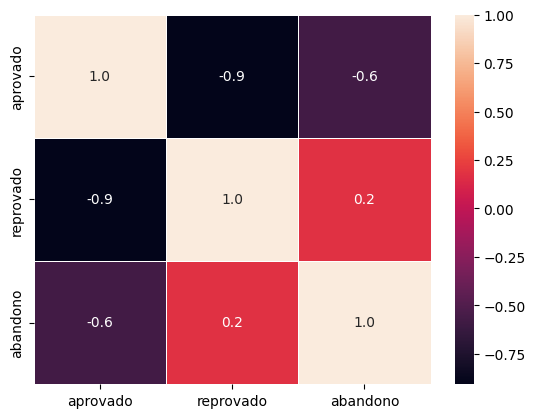

In [53]:
plot_correlation_2019 = sn.heatmap(correlation_2019, annot = True, fmt=".1f", linewidths=.6)

### 2020

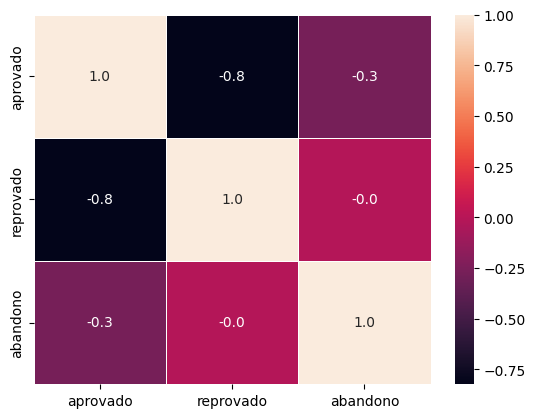

In [54]:
plot_correlation_2020 = sn.heatmap(correlation_2020, annot = True, fmt=".1f", linewidths=.6)

### 2021

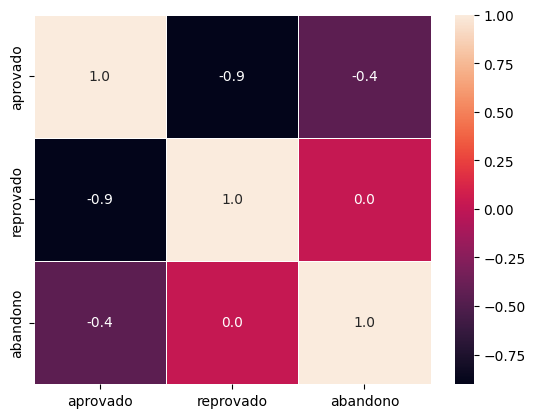

In [55]:
plot_correlation_2021 = sn.heatmap(correlation_2021, annot = True, fmt=".1f", linewidths=.6)